In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN,AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import numpy as np

In [5]:
df = pd.read_csv('C:/Users/GSDS/Desktop/technology_product_sales_data.csv')

In [6]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0


In [7]:
# Preprocess the data
# Encode categorical variables
le = LabelEncoder()
df['ProductCategory'] = le.fit_transform(df['ProductCategory'])
df['ProductBrand'] = le.fit_transform(df['ProductBrand'])

In [8]:
# Normalize numerical features
scaler = StandardScaler()
df[['ProductPrice', 'CustomerAge', 'PurchaseFrequency', 'CustomerSatisfaction']] = scaler.fit_transform(
    df[['ProductPrice', 'CustomerAge', 'PurchaseFrequency', 'CustomerSatisfaction']])

In [9]:
# Drop non-numeric columns for clustering
data_numeric = df.drop(['ProductID'], axis=1)

In [10]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust the number of clusters if needed
clusters = kmeans.fit_predict(data_numeric)

In [11]:
# Add cluster labels to the dataset
df['Cluster'] = clusters

In [12]:
# Evaluate the clusters using the Silhouette Score
silhouette_avg = silhouette_score(data_numeric, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.1397389801270252


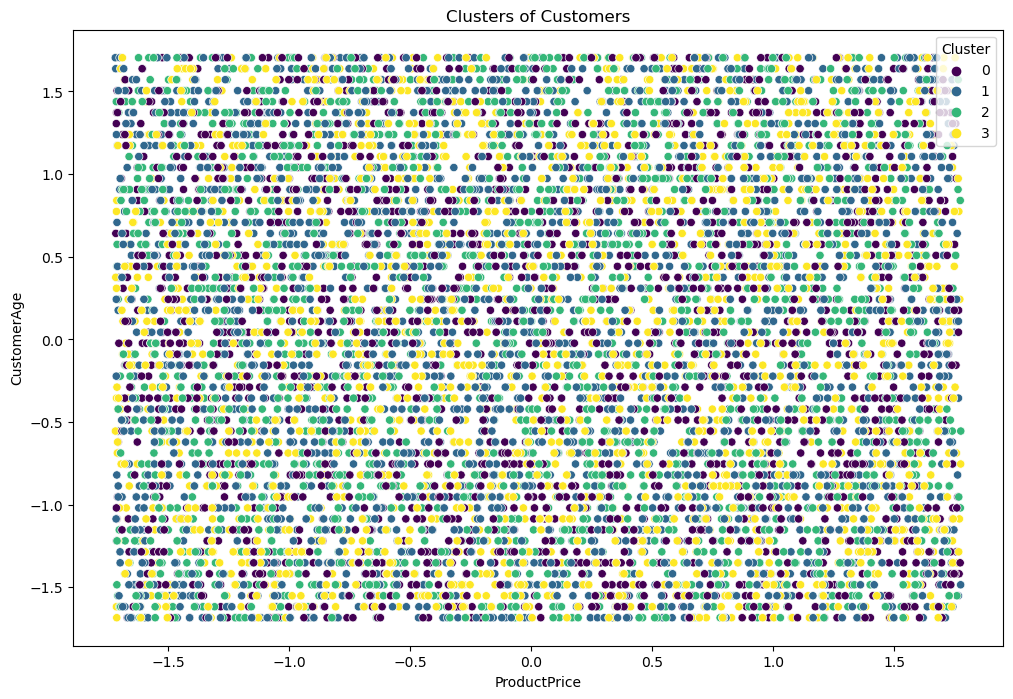

In [13]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='ProductPrice', y='CustomerAge', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of Customers')
plt.show()

In [14]:
# Analyze the clusters
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

            ProductID  ProductCategory  ProductBrand  ProductPrice  \
Cluster                                                              
0        10371.248369         0.513514      2.986021      0.029920   
1        10320.127474         3.267221      1.134204     -0.059629   
2        10424.663964         2.981081      3.494595      0.000797   
3        10385.865750         0.990512      0.504269      0.040154   

         CustomerAge  CustomerGender  PurchaseFrequency  CustomerSatisfaction  \
Cluster                                                                         
0          -0.016890        0.487418           0.052280             -0.018708   
1           0.020551        0.518211          -0.042849             -0.003915   
2          -0.003780        0.506306          -0.005969             -0.021836   
3          -0.003450        0.522296           0.004410              0.046733   

         PurchaseIntent  
Cluster                  
0              0.537745  
1             

In [15]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust the parameters eps and min_samples as needed
clusters = dbscan.fit_predict(data_numeric)

In [16]:
# Add cluster labels to the dataset
df['Cluster'] = clusters

In [17]:
# Evaluate the clusters using the Silhouette Score
# Only calculate silhouette score if there are more than one cluster
if len(set(clusters)) > 1:
    silhouette_avg = silhouette_score(data_numeric, clusters)
    print(f'Silhouette Score: {silhouette_avg}')
else:
    print("Silhouette Score cannot be calculated with only one cluster.")

Silhouette Score: -0.3166695346988581


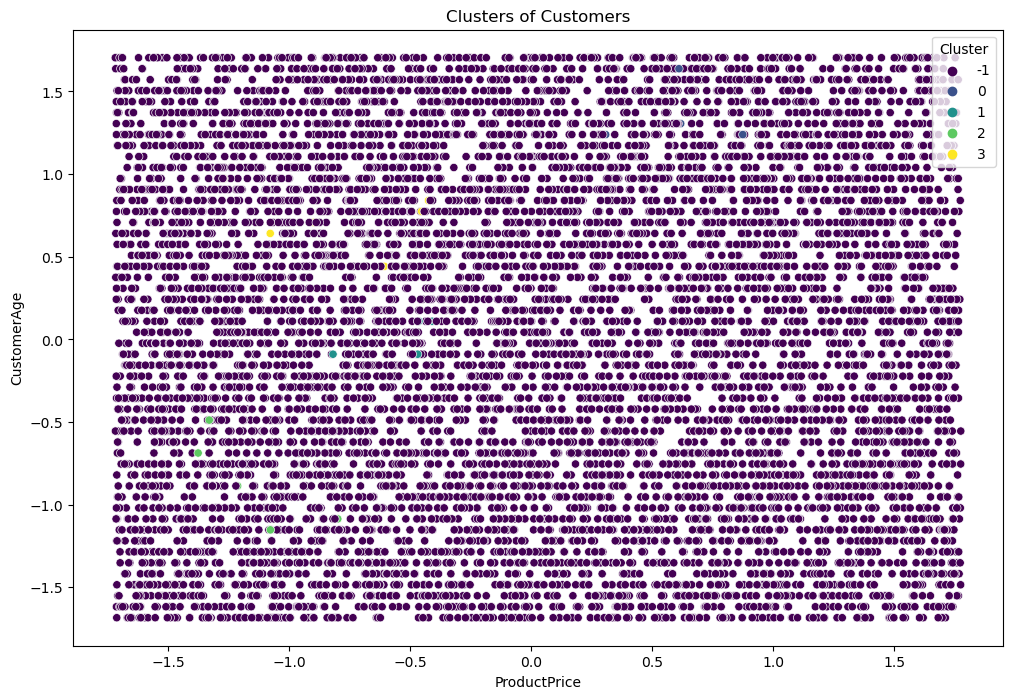

In [18]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='ProductPrice', y='CustomerAge', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of Customers')
plt.show()

In [19]:
# Analyze the clusters
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

            ProductID  ProductCategory  ProductBrand  ProductPrice  \
Cluster                                                              
-1       10372.936059         2.006127      2.011028      0.001094   
 0       10504.500000         1.000000      3.000000      0.731561   
 1       11670.400000         2.000000      1.000000     -0.471255   
 2       11058.333333         2.000000      3.000000     -1.185521   
 3        9320.666667         4.000000      0.000000     -0.789700   

         CustomerAge  CustomerGender  PurchaseFrequency  CustomerSatisfaction  \
Cluster                                                                         
-1         -0.000851        0.509636          -0.000525              0.000548   
 0          1.316550        0.000000          -0.772993              0.002847   
 1          0.096518        1.000000          -0.193126              0.714478   
 2         -0.853380        0.000000           1.119204             -1.420415   
 3          0.729783   

In [20]:
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)  # Adjust the number of clusters as needed
clusters = agg_clustering.fit_predict(data_numeric)

In [21]:
# Add cluster labels to the dataset
df['Cluster'] = clusters

In [22]:
# Evaluate the clusters using the Silhouette Score
silhouette_avg = silhouette_score(data_numeric, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.0882306522573006


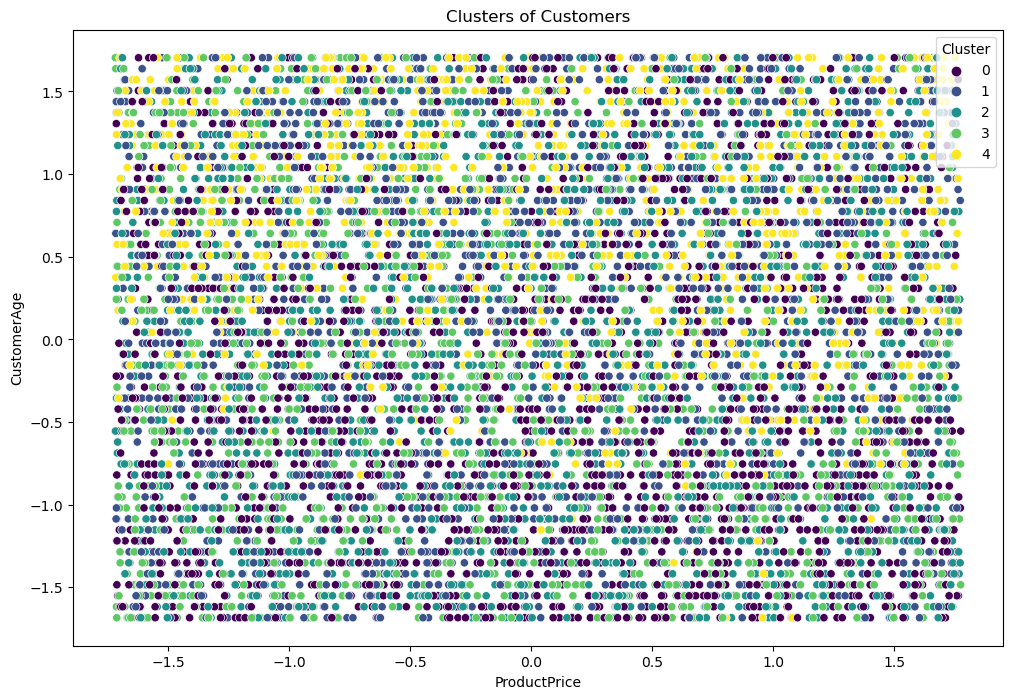

In [23]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='ProductPrice', y='CustomerAge', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of Customers')
plt.show()

In [24]:
# Analyze the clusters
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

            ProductID  ProductCategory  ProductBrand  ProductPrice  \
Cluster                                                              
0        10414.739992         2.973873      3.227560      0.081001   
1        10371.788472         0.844481      3.266993     -0.016311   
2        10420.811139         0.774684      0.878987      0.032562   
3        10426.322560         3.157725      0.617970     -0.179360   
4        10160.331754         2.398104      1.370458      0.040238   

         CustomerAge  CustomerGender  PurchaseFrequency  CustomerSatisfaction  \
Cluster                                                                         
0          -0.303116        0.498525          -0.013946             -0.100914   
1           0.131981        0.467102           0.242608              0.163438   
2          -0.032568        0.499747           0.179874              0.128598   
3          -0.229500        0.535876           0.131321              0.052527   
4           0.707693   

In [25]:
 import joblib
# Save the model to a file
joblib_file = "kmeans_model.pkl"
joblib.dump(kmeans, joblib_file)
print("Model saved successfully.")

Model saved successfully.
